In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score



# Load the Dogs vs. Cats dataset
train_dataset, info = tfds.load('cats_vs_dogs', split='train[:80%]', with_info=True)
test_dataset = tfds.load('cats_vs_dogs', split='train[80%:]', with_info=False)

# Preprocess the data
## your code goes here##
def preprocess(features):
    image = features['image']
    image = tf.image.resize(image, (299, 299))  # Resize to 150x150
    image = image / 255.0  # Normalize to [0,1]
    label = features['label']
    return image, label

train_dataset = train_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

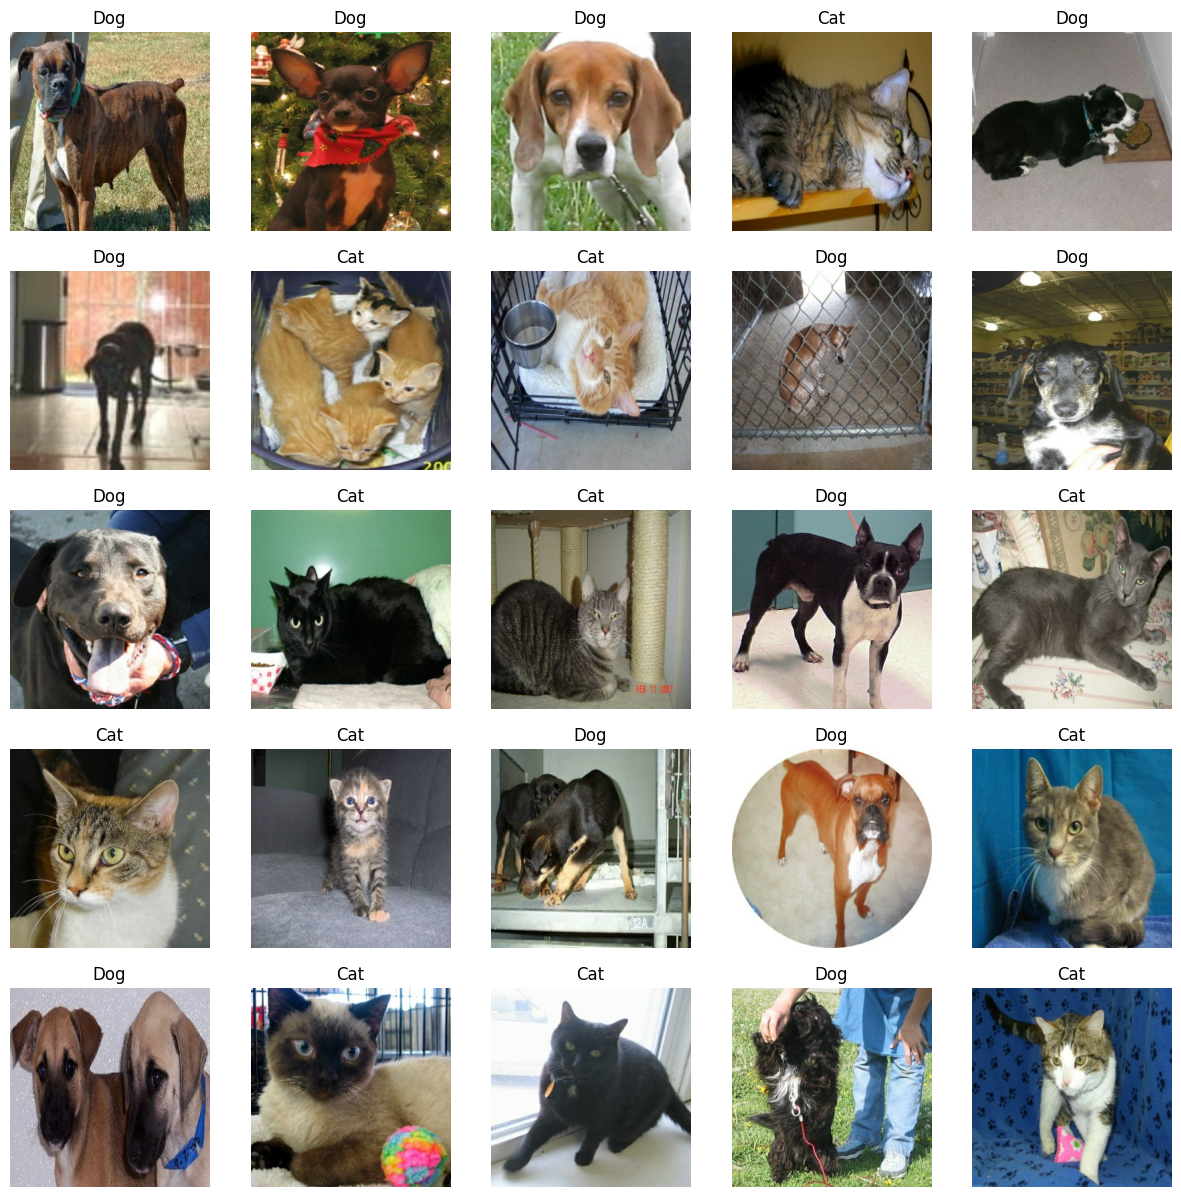

In [ ]:
##show some of images with their labels
## your code goes here##

import matplotlib.pyplot as plt

# Define a function to plot images with their labels
def show_images(dataset, num_images):
    plt.figure(figsize=(15, 15))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(image.numpy())
        plt.title("Cat" if label.numpy() == 0 else "Dog")
        plt.axis("off")
    plt.show()

# Show some images from the training dataset with their labels
show_images(train_dataset.unbatch(), 25)

In [21]:
# Load the Inception-v3 model
inception_model =InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299, 3))
print(inception_model.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_282 (Conv2D)         (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_282 (B  (None, 149, 149, 32)         96        ['conv2d_282[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_282 (Activation  (None, 149, 149, 32)         0         ['batch_normalizati

In [22]:
#create your model
#dont forget to freeze the pretrained part
##your code goes here##
# Freeze the pretrained layers
for layer in inception_model.layers:
    layer.trainable = False

# Add custom layers on top of the pretrained base
x = inception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=inception_model.input, outputs=predictions)

In [23]:
# Compile the model
##your code goes here##

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
##your code goes here##

print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_282 (Conv2D)         (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_282 (B  (None, 149, 149, 32)         96        ['conv2d_282[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_282 (Activation  (None, 149, 149, 32)         0         ['batch_normalization_28

In [24]:
#train your model
##your code goes here##
# Train the model
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
582/582 [==============================] - 99s 161ms/step - loss: 0.0618 - accuracy: 0.9840 - val_loss: 0.0207 - val_accuracy: 0.9936
Epoch 2/5
582/582 [==============================] - 91s 157ms/step - loss: 0.0340 - accuracy: 0.9911 - val_loss: 0.0184 - val_accuracy: 0.9946
Epoch 3/5
582/582 [==============================] - 91s 157ms/step - loss: 0.0250 - accuracy: 0.9926 - val_loss: 0.0190 - val_accuracy: 0.9948
Epoch 4/5
582/582 [==============================] - 91s 156ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0208 - val_accuracy: 0.9936
Epoch 5/5
582/582 [==============================] - 91s 157ms/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0180 - val_accuracy: 0.9955


146/146 [==============================] - 20s 137ms/step - loss: 0.0180 - accuracy: 0.9955
Test Accuracy: 99.55%


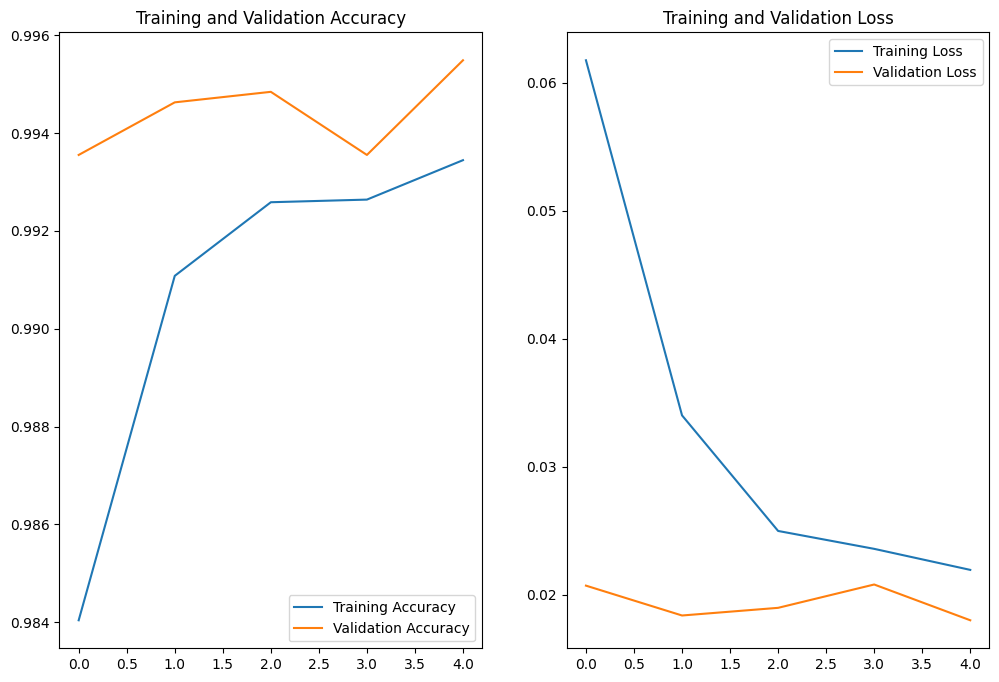

In [25]:
#report the accuracy on your test set
##your code goes here##

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot the training and validation accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)